In [1]:
using PyPlot, Printf, SymPy, ForwardDiff
PyPlot.matplotlib.font_manager.fontManager.addfont("OpenSans-Regular.ttf")
PyPlot.matplotlib.style.use("grandbudapest.mplstyle")

function draw_axes(;color="0.6")
    axvline(x=0, color=color, lw=2, zorder=1)
    axhline(y=0, color=color, lw=2, zorder=1)
end

# markers = ["o", "*", "P", "X", "s", "D"]
# colorz = Dict("no gas" => "#95a5a6", "peace" => (0.0, 0.6, 0.8), "competition" => "#e74c3c")
colorz = Dict("no gas" => "k", "peace" => "C2", "cooperation" => "C0", "competition" => "C3")
marker = "X"

In /home/cokes/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/cokes/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/cokes/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/cokes/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/cokes/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylel

"X"

# entropy of the wheel

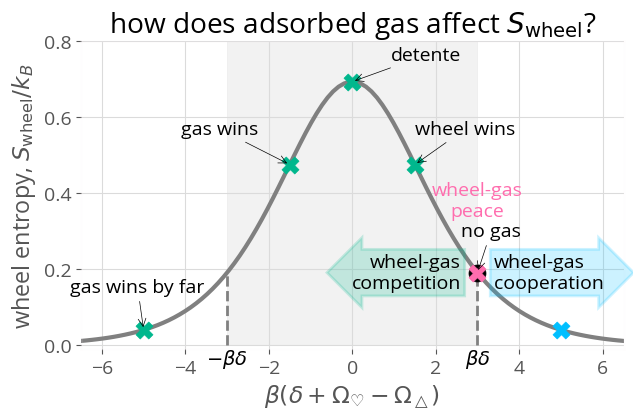

In [2]:
βθ = range(-6.5, 6.5, length=100)
w(βθ) = exp(-βθ) / (1.0 + exp(-βθ))
S(w) = -(w * log(w) + (1.0 - w) * log.(1.0 - w))

ht = 0.8 # height
wd = βθ[end] * 2 # width
function plot_θ(θ::Float64, marker::String, a_color, label::String, dx::Float64, dy::Float64)
    scatter([θ], [S(w(θ))], marker=marker, zorder=4, s=marker=="*" ? 1.35 * s : s, color=a_color)
#     text(θ + dx * wd, S(w(θ)) + dy * ht, label)
    if label == "none"
        return
    end
    if label != ""
        annotate(label,
                    xy=(θ, S(w(θ))), xycoords="data",
                    xytext=(θ + dx * wd, S(w(θ)) + dy * ht), textcoords="data",
                    arrowprops=Dict(:arrowstyle => "->", #linestyle="dashed",
                                    :color => "k"
                                    ),
                    zorder=1241,
                    )
    end
end

s = 150 # markersize
figure(figsize=(7, 4))
plot(βθ, S.(w.(βθ)), zorder=2, color="0.5", lw=3)
ylabel(L"wheel entropy, $S_\mathrm{wheel}/k_B$")
xlabel(L"$\beta(\delta +\Omega_\heartsuit-\Omega_\bigtriangleup)$")

# two-state model (no gas)
βδ = 3.0
plot_θ(βδ, "o", colorz["no gas"], "no gas", -0.03, 0.12)
text(βδ, 0.34, "wheel-gas" * "\n" * "peace", color=colorz["peace"], ha="center")
plot_θ(βδ, marker, colorz["peace"], "", 0.0, 0.0)

dx = 0.4
bbox_props = Dict(:boxstyle=>"rarrow,pad=0.2", :fc=>colorz["cooperation"], :ec=>colorz["cooperation"], :lw=>2, :alpha=>0.2)
text([βδ + dx], [S(w(βδ))], "wheel-gas\ncooperation ", ha="left", va="center", rotation=0,
            size=14,
            bbox=bbox_props)

bbox_props = Dict(:boxstyle=>"larrow,pad=0.2", :fc=>colorz["competition"], :ec=>colorz["competition"], :lw=>2, :alpha=>0.2)
text([βδ - dx], [S(w(βδ))], "wheel-gas\ncompetition", ha="right", va="center", rotation=0,
            size=14,
            bbox=bbox_props)


# with gas. wheel-gas peace
βΩ♡ = -1.0
βω△ = -3.0
θ = βδ+βΩ♡-βω△
plot_θ(θ , marker, colorz["cooperation"], "none", 0.1/sqrt(2), 0.1/sqrt(2))

# with gas. wheel-gas competition. wheel wins.
βΩ♡ = -2.5
βω△ = -1.0
θ = βδ+βΩ♡-βω△
plot_θ(θ , marker, colorz["competition"], "wheel wins", 0.0, 0.1)

# with gas. wheel-gas competition. detente
βΩ♡ = -4.0
βω△ = -1.0
θ = βδ+βΩ♡-βω△
plot_θ(θ , marker, colorz["competition"], "detente", 0.1/sqrt(2), 0.1/sqrt(2))

# with gas. wheel-gas competition. gas wins.
βΩ♡ = -5.5
βω△ = -1.0
θ = βδ+βΩ♡-βω△
plot_θ(θ , marker, colorz["competition"], "gas wins", -0.2, 0.1)

# with gas. wheel-gas competition. gas wins by far.
βΩ♡ = -9.0
βω△ = -1.0
θ = βδ+βΩ♡-βω△
plot_θ(θ , marker, colorz["competition"], "gas wins by far", -0.135, 0.125)

# # legend(numpoints=1, bbox_to_anchor=(1, 0.8))
title(L"how does adsorbed gas affect $S_\mathrm{wheel}$?")
# # draw_axes()
xlim([-wd/2, wd/2])
ylim([-0.01, ht])

fill_between([-βδ, βδ], zeros(2), ht * ones(2), color="0.5", alpha=0.1, zorder=0)

vlines(βδ, 0.0, S(w(βδ)), linestyle="--", color="0.5")
vlines(-βδ, 0.0, S(w(-βδ)), linestyle="--", color="0.5")
x_t = collect(-6:2:6)
xticks(x_t)
text(βδ, -0.05, L"$\beta\delta$", ha="center")
text(-βδ, -0.05, L"$-\beta\delta$", ha="center")

savefig("wheel_entropy.pdf", format="pdf", bbox_inches="tight")

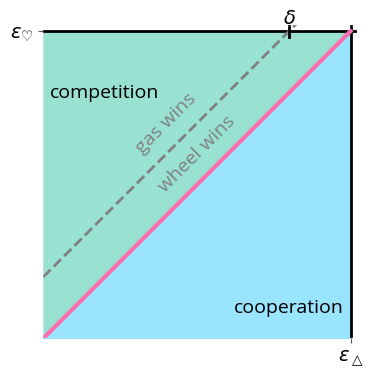

In [3]:
δ = 1.0
ϵ♡ = range(-5.0, 0.0, length=10)
ϵΔ = range(-5.0, 0.0, length=10)

fig, ax = subplots(figsize=(4, 4))
plot(ϵ♡, ϵΔ, color=colorz["peace"], lw=3, label="peace")
plot(ϵ♡, ϵ♡.+δ, color="0.5", linestyle="--")
xticks([0], [L"$\epsilon_\bigtriangleup$"], color="k")
yticks([0], [L"$\epsilon_\heartsuit$"], color="k")
# annotate(s="", xy=(0,-5.0), xytext=(0,0.1), arrowprops=Dict("facecolor"=>"k", "lw"=>1))
draw_axes(color="k")
fill_between(ϵ♡, -5.0, ϵ♡, color=colorz["cooperation"], label="cooperation",alpha=0.4)
fill_between(ϵ♡, 0.0, ϵ♡, color=colorz["competition"], label="competition",alpha=0.4)
xlim([-5.0, 0.1])
ylim([-5.0, 0.1])

text(-4., -1.0, "competition", ha="center", va="center")
text(-1.0, -4.5, "cooperation", ha="center", va="center")
text(-2.5, -2.0, "wheel wins", ha="center", va="center", rotation=45.0, color="0.5")
text(-3.0, -1.5, "gas wins", ha="center", va="center", rotation=45.0, color="0.5")
plot([-δ, -δ], [-0.1, 0.1], color="k")
text(-δ, 0.2, L"$\delta$", ha="center", va="center")
ax.set_aspect("equal", adjustable="box")
tight_layout()
savefig("mat_space.pdf", format="pdf")

# Langmuir model

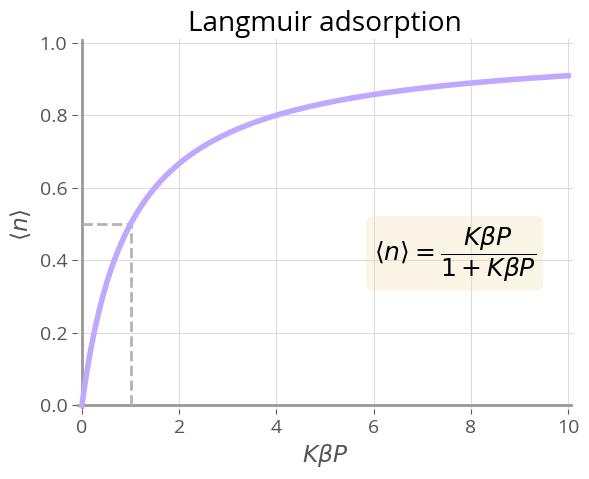

PyObject Text(0.5, 1.0, 'Langmuir adsorption')

In [4]:
kp = range(0.0, 10.0, length=200)
exp_n = kp ./ (1 .+ kp)

figure()
plot(kp, exp_n, linewidth=4, color="C4")
ϵ=1e-1
xlim([0-ϵ, maximum(kp)+ϵ])
ϵ=1e-2
ylim([0-ϵ, 1+ϵ])
xlabel(L"$K\beta P$")
ylabel(L"$\langle n \rangle$")
draw_axes()
props = Dict("boxstyle"=>"round", "facecolor"=>"wheat", "alpha"=>0.3)
text(6, 0.4, L"$\langle n \rangle=\dfrac{K\beta P}{1+K\beta P}$", fontsize=18, bbox=props)
vlines(1, 0, 0.5, color="0.7", linestyle="--")
hlines(0.5, 0, 1, color="0.7", linestyle="--")
title("Langmuir adsorption")

# other stuff

In [5]:
struct Material
    δ::Float64
    ϵ♡::Float64
    ϵ△::Float64
end

function Base.show(io::IO, material::Material)
    @printf("MORF material with:\n\tδ = %.3f\n\tϵ♡ = %.3f\n\tϵ△ = %.3f\n", material.δ, material.ϵ♡, material.ϵ△)
end

In [6]:
function K(material::Material, kT::Real) # must assert β::Real as opposed to β::Float64 for ForwardDiff.jl to work
    # probability ring is on ♡ when gas is absent
    p = 1 / (1 + exp(-material.δ / kT))
    return p * exp(-material.ϵ△ / kT) + (1 - p) * exp(-material.ϵ♡ / kT)
end

function n(material::Material, kT::Real, P::Float64) # must use Real for ForwardDiff.jl
    KβP = K(material, kT) * P / kT
    return KβP / (1.0 + KβP)
end

const kT_room = 2.479 # kJ/mol

2.479

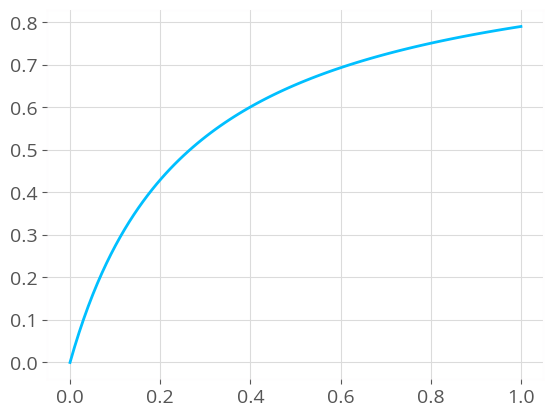

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb024ed9f98>

In [7]:
material = Material(2.0, -4.0, -6.0)
figure()
p = range(0, 1, length=100)
plot(p, [n(material, kT_room, p_i) for p_i in p])

In [8]:
function ∂n_∂kT(material::Material, kT::Float64, P::Float64)
    # view n as a function of β only.
    n_of_kT(x) = n(material, x[1], P) # x plays role of kT
    ∂n_∂kT_of_T = x -> ForwardDiff.gradient(n_of_kT, x) # x plays role of kT
    return ∂n_∂kT_of_T([kT])[1]
end

function ∂K_∂kT(material::Material, kT::Float64)
    # view K as a function of kT only.
    K_of_kT(x) = K(material, x[1]) # x plays role of kT
    ∂K_∂kT_of_kT = x -> ForwardDiff.gradient(K_of_kT, x) # x plays role of kT
    return ∂K_∂kT_of_kT([kT])[1]
end

∂K_∂kT (generic function with 1 method)

## check with symbolic differentiation

In [9]:
kT = Sym("kT")
ϵ♡ = Sym("ϵ♡")
ϵ△ = Sym("ϵ△")
δ = Sym("δ")
P = Sym("P")

const K_symbolic = 1 / (1+exp(-δ/kT)) * (exp(-ϵ△/kT) + exp(-(ϵ♡+δ)/kT))

 -δ - ϵ♡    -ϵ△ 
 ───────    ────
    kT       kT 
ℯ        + ℯ    
────────────────
         -δ     
         ───    
          kT    
    1 + ℯ       

In [10]:
const n_symbolic = K_symbolic * P / kT / (1 + K_symbolic * P / kT)

            ⎛ -δ - ϵ♡    -ϵ△ ⎞          
            ⎜ ───────    ────⎟          
            ⎜    kT       kT ⎟          
          P⋅⎝ℯ        + ℯ    ⎠          
────────────────────────────────────────
              ⎛  ⎛ -δ - ϵ♡    -ϵ△ ⎞    ⎞
   ⎛     -δ ⎞ ⎜  ⎜ ───────    ────⎟    ⎟
   ⎜     ───⎟ ⎜  ⎜    kT       kT ⎟    ⎟
   ⎜      kT⎟ ⎜P⋅⎝ℯ        + ℯ    ⎠    ⎟
kT⋅⎝1 + ℯ   ⎠⋅⎜──────────────────── + 1⎟
              ⎜      ⎛     -δ ⎞        ⎟
              ⎜      ⎜     ───⎟        ⎟
              ⎜      ⎜      kT⎟        ⎟
              ⎝   kT⋅⎝1 + ℯ   ⎠        ⎠

In [11]:
const ∂n_∂kT_symbolic = diff(n_symbolic, "kT")

                                                                ⎛    ⎛    -ϵ△ 
                                                                ⎜    ⎜    ────
                                                                ⎜    ⎜     kT 
                                                                ⎜    ⎜ϵ△⋅ℯ    
                                             ⎛ -δ - ϵ♡    -ϵ△ ⎞ ⎜  P⋅⎜────────
                                             ⎜ ───────    ────⎟ ⎜    ⎜    2   
     ⎛    -ϵ△               -δ - ϵ♡⎞         ⎜    kT       kT ⎟ ⎜    ⎝  kT    
     ⎜    ────              ───────⎟       P⋅⎝ℯ        + ℯ    ⎠⋅⎜- ───────────
     ⎜     kT                  kT  ⎟                            ⎜             
     ⎜ϵ△⋅ℯ       (-δ - ϵ♡)⋅ℯ       ⎟                            ⎜             
   P⋅⎜──────── - ──────────────────⎟                            ⎜             
     ⎜    2               2        ⎟                            ⎜            k
     ⎝  kT              kT         ⎠                

In [12]:
const ∂K_∂kT_symbolic = diff(K_symbolic, "kT")

    -ϵ△               -δ - ϵ♡                            
    ────              ───────                            
     kT                  kT                              
ϵ△⋅ℯ       (-δ - ϵ♡)⋅ℯ            ⎛ -δ - ϵ♡    -ϵ△ ⎞  -δ 
──────── - ──────────────────     ⎜ ───────    ────⎟  ───
    2               2             ⎜    kT       kT ⎟   kT
  kT              kT            δ⋅⎝ℯ        + ℯ    ⎠⋅ℯ   
───────────────────────────── - ─────────────────────────
                -δ                                 2     
                ───                      ⎛     -δ ⎞      
                 kT                      ⎜     ───⎟      
           1 + ℯ                       2 ⎜      kT⎟      
                                     kT ⋅⎝1 + ℯ   ⎠      

In [13]:
# if P is not involved
function eval_sym(sym::Sym, material::Material, kT::Float64)
    params = Dict("kT" => kT, "ϵ♡" => material.ϵ♡, "ϵ△" => material.ϵ△, "δ" => material.δ)
    return convert(Float64, sym.subs(params))
end

# if P is involved
function eval_sym(sym::Sym, material::Material, kT::Float64, P::Float64)
    params = Dict("kT" => kT, "ϵ♡" => material.ϵ♡, "ϵ△" => material.ϵ△, "δ" => material.δ, "P" => P)
    return convert(Float64, sym.subs(params))
end

eval_sym (generic function with 2 methods)

tests

In [14]:
material = Material(rand(), -rand(), -rand())
kT = rand()
P = rand()
params = Dict("kT" => kT, "ϵ♡" => material.ϵ♡, "ϵ△" => material.ϵ△, "δ" => material.δ)

# K
@assert isapprox(K(material, kT), eval_sym(K_symbolic, material, kT))
# dK/d(kT)
@assert isapprox(∂K_∂kT(material, kT), eval_sym(∂K_∂kT_symbolic, material, kT))
# n (P=0.2)
@assert isapprox(n(material, kT, P), eval_sym(n_symbolic, material, kT, P))
# dn/d(kT)
@assert isapprox(∂n_∂kT(material, kT, P), eval_sym(∂n_∂kT_symbolic, material, kT, P))

## to study comparable Langmuir material

In [18]:
"""
What is the energy of adsorption ϵ for a Langmuir material that exhibits the same K as the RMS-MOF at β?
K_L = e^(-βϵ)
"""
ϵ□(material::Material, kT::Float64) = -kT * log(K(material, kT))
∂K□_∂kT(material::Material, kT::Float64) = K(material, kT) * ϵ□(material, kT) / kT ^ 2
function n□(material::Material, kT::Float64, P::Float64)
    K□ = exp(-ϵ□(material, kT) / kT)
    KβP = K□ * P / kT
    return KβP / (1 + KβP)
end

ϵ□_test = randn()
RMSMOF□□ = Material(randn(), ϵ□_test, ϵ□_test)

@assert exp(-ϵ□(material, kT) / kT) ≈ K(material, kT)
@assert ϵ□(RMSMOF□□, kT) ≈ ϵ□_test
@assert n□(RMSMOF□□, kT, P) ≈ n(RMSMOF□□, kT, P)

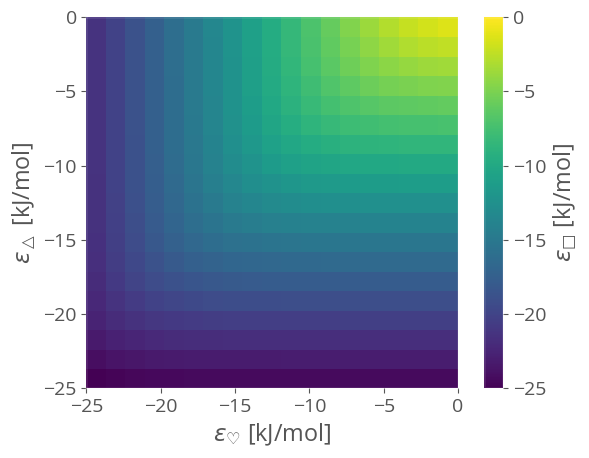

In [29]:
δ = 3.0
kT = kT_room
nb_pts = 20
ϵ_range = range(-25.0, stop=0.0, length=nb_pts)

ϵ□s = zeros(nb_pts, nb_pts)
∂
for (i, ϵ♡) in enumerate(ϵ_range)
    for (j, ϵ△) in enumerate(ϵ_range)
        material = Material(δ, ϵ♡, ϵ△)
        
        # find epsilon that gives same K for Langmuir material
        ϵ□s[j, i] = ϵ□(material, kT)
        
        # j, i... this is not a bug.
        #  try the following two to see:
        #    Z[j, i] = βϵ♡
        #    Z[j, i] = βϵ△
    end
end

fig, ax = subplots()
pcolor(ϵ_range, ϵ_range, ϵ□s, vmax=0.0)
ax.set_aspect("equal", "box")

cbar = colorbar(label=L"$\epsilon_□$ [kJ/mol]")
xlabel(L"$\epsilon_\heartsuit$ [kJ/mol]")
ylabel(L"$\epsilon_\bigtriangleup$ [kJ/mol]")
tight_layout()

savefig("epsilon_square.pdf", format="pdf")